Based on https://www.youtube.com/watch?v=p_di4Zn4wz4, 

Numeric solution for a differential equation describing a pendulum with initial conditions(initial angle and angular velocity) and visualization in a phase space

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Physical constants

In [10]:
g = 9.8 #gravity constant
L = 2 #lenght of the pendulum
mu = 0.1 #air resistance constant
delta_t = 0.01 #changes in time

### Initial conditions

In [8]:
THETA_0 = np.pi/3 # inivial value for pendulum angle
THETA_PRIME_0  = 0 # initial value for angular velocity 

### Diffferential equation

$α = -μw(t)  - \frac{g}{L}sin(θ(t))$

* $θ(t)$ = angle of pendulum at time t
* $w(t)$ = angular velocity at time t(derivative of angle)
* $α(t)$ = angular acceleration at  time t(derivative of velocity, second derivative of angle)

In [4]:
def calc_theta_bi_prime(theta,theta_prime):
    return (-mu * theta_prime) - (g/L) * np.sin(theta) 


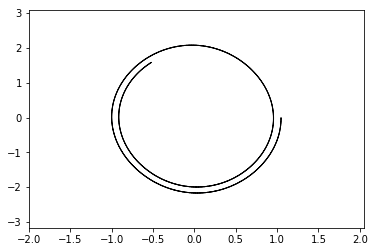

(-0.5209927480925516, 1.5831582021021597, 2.34895103685301)

In [13]:
def theta(t):
    # prepare canvas for visualization
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # initialize tuples to store max and min values seen to configure visualization ranges
    range_theta = (THETA_0,THETA_0)
    range_theta_prime = (THETA_PRIME_0,THETA_PRIME_0)

    # in every iteration, we will update the angle and the angular velocity, with first iteration having initial conditions
    theta = THETA_0
    theta_prime = THETA_PRIME_0
    
    for time in np.arange(0,t,delta_t):
        
        # calc angular acceleration given angle and angular velocityu
        theta_bi_pŕime = calc_theta_bi_prime(theta,theta_prime)
        #calculate deltas for angle and angular velocity
        delta_theta = theta_prime*delta_t
        delta_theta_prime = theta_bi_pŕime*delta_t
        
        #create a tiny vector in the visualization
        ax.arrow(theta,theta_prime,delta_theta,delta_theta_prime)
        
        # update angle and angular velocity with their deltas
        theta += delta_theta
        theta_prime += delta_theta_prime
        
        # for visualization purposes, update maximun and minimun values seen so far
        range_theta = (min(range_theta[0],theta) ,max(range_theta[1],theta)  )
        range_theta_prime = (min(range_theta_prime[0],theta_prime) ,max(range_theta_prime[1],theta_prime)  )
        
    # add additional space to the chart for visualization purposes
    range_theta = (range_theta[0] - 1 , range_theta[1] +1)
    range_theta_prime = (range_theta_prime[0] - 1 , range_theta_prime[1] + 1)
    
    ax.set_xlim(range_theta)
    ax.set_ylim(range_theta_prime)
    plt.show()
    
    # finally return angle, angular velocity and angular acceleration for time t
    return theta,theta_prime,theta_bi_pŕime

theta(5)

For initial values of position(angle) and velocity(angular velocity)  pi/3,0 , angle(position) velocity and acceleration are : (-0.5209927480925516, 1.5831582021021597, 2.34895103685301) which seems to converge to a fixed point 0,0 (angle of 0, with velocity of 0)